In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('default')
sns.set_palette("husl")

In [37]:
df = pd.read_csv('/Users/nishant/Desktop/Datasets/Phonepe/aggregated/Phonepe/phonepe_transaction.csv')

In [38]:
# Convert all column names to lowercase for consistency
df.columns = df.columns.str.lower()
print("Column names converted to lowercase:")
print(df.columns)

Column names converted to lowercase:
Index(['location_type', 'country', 'state', 'location_name', 'quarter',
       'from_date', 'to_date', 'transaction_category', 'payment_type',
       'transaction_count', 'transaction_amount', 'transaction_amount_crores',
       'avg_transaction_value'],
      dtype='object')


In [ ]:
print(df.columns)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isnull().sum() # Check for missing values

Top 10 States by Transaction Amount and Count:

In [39]:
# Filter out 'All States'
df_filtered = df[df['state'] != 'All States']
top_10_states_amount = df_filtered.groupby('state')['transaction_amount'].sum().sort_values(ascending=False).head(10)
# Convert the transaction amount to crores
top_10_states_amount_crores = (top_10_states_amount / 1e7).round(2)
print("Top 10 States by Transaction Amount (in Crores):")
print(top_10_states_amount_crores)

Top 10 States by Transaction Amount (in Crores):
state
Telangana         4165593.80
Karnataka         4067871.88
Maharashtra       4037418.51
Andhra Pradesh    3466908.86
Uttar Pradesh     2688522.23
Rajasthan         2634323.70
Madhya Pradesh    1912527.11
Bihar             1790135.09
West Bengal       1558415.94
Odisha            1226398.27
Name: transaction_amount, dtype: float64


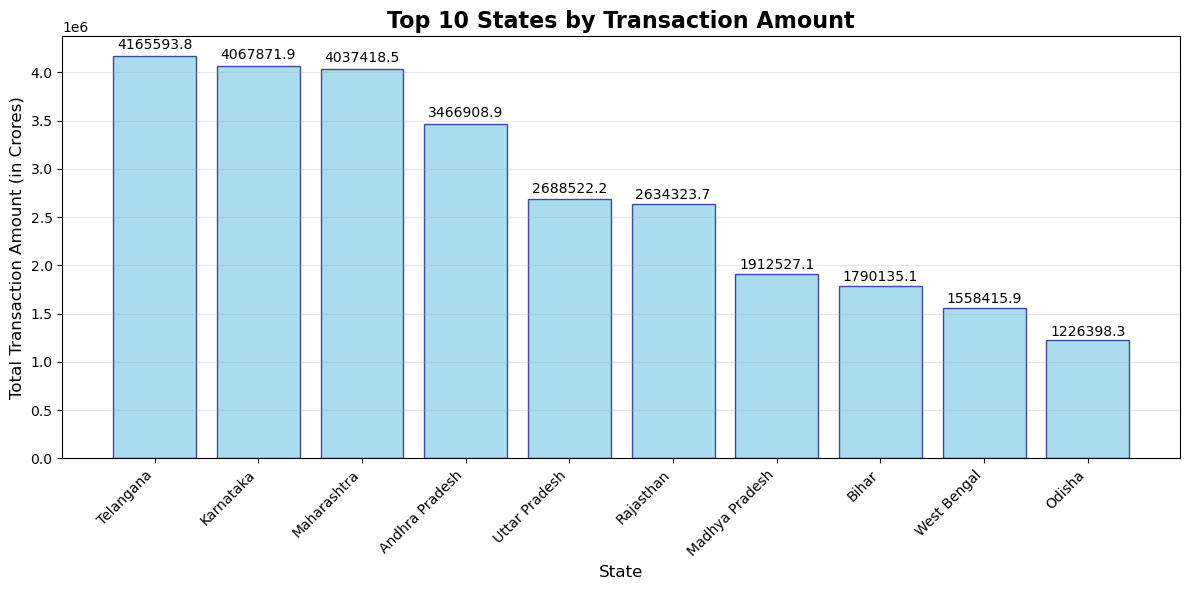

In [40]:
# 2. Visualize the top 10 states by transaction amount
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_states_amount_crores.index, top_10_states_amount_crores.values, 
               color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Top 10 States by Transaction Amount', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Transaction Amount (in Crores)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

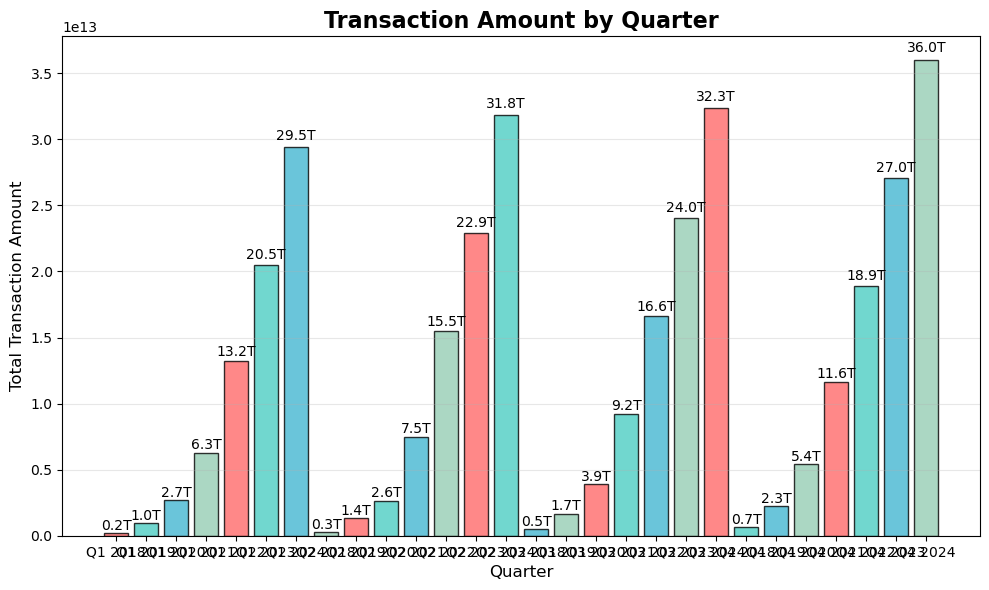

In [41]:
# Group by quarter and sum the transaction amount
quarterly_amount = df_filtered.groupby('quarter')['transaction_amount'].sum().reset_index()

# Create a bar chart to visualize the quarterly transaction amount
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(quarterly_amount['quarter'], quarterly_amount['transaction_amount'], 
               color=colors, edgecolor='black', alpha=0.8)

plt.title('Transaction Amount by Quarter', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height/1e12:.1f}T', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

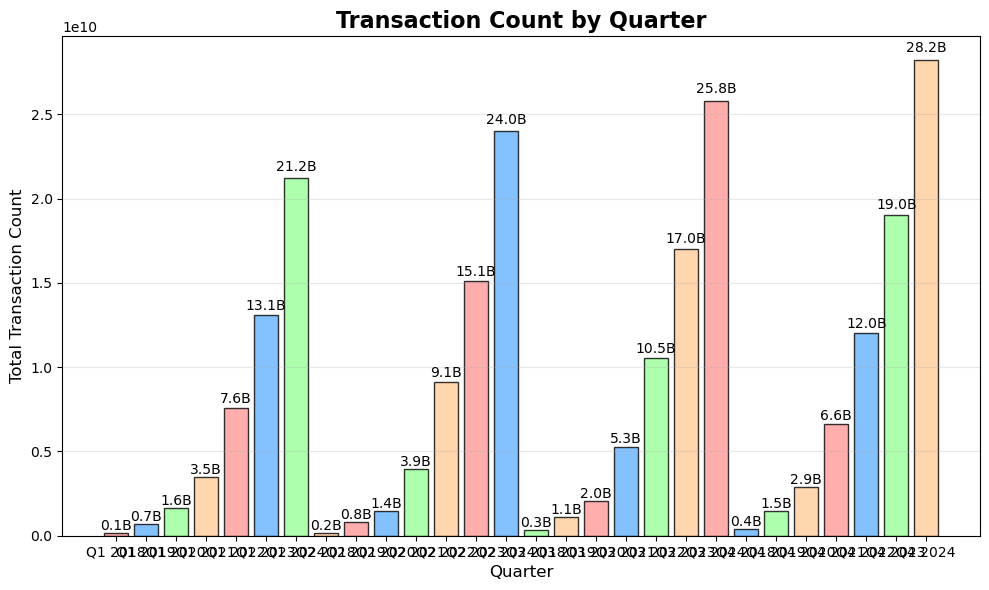

In [42]:
# Group by quarter and sum the transaction count
quarterly_count = df_filtered.groupby('quarter')['transaction_count'].sum().reset_index()

# Create a bar chart to visualize the quarterly transaction count
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
bars = plt.bar(quarterly_count['quarter'], quarterly_count['transaction_count'], 
               color=colors, edgecolor='black', alpha=0.8)

plt.title('Transaction Count by Quarter', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Transaction Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height/1e9:.1f}B', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

4. Most Common Transaction Types

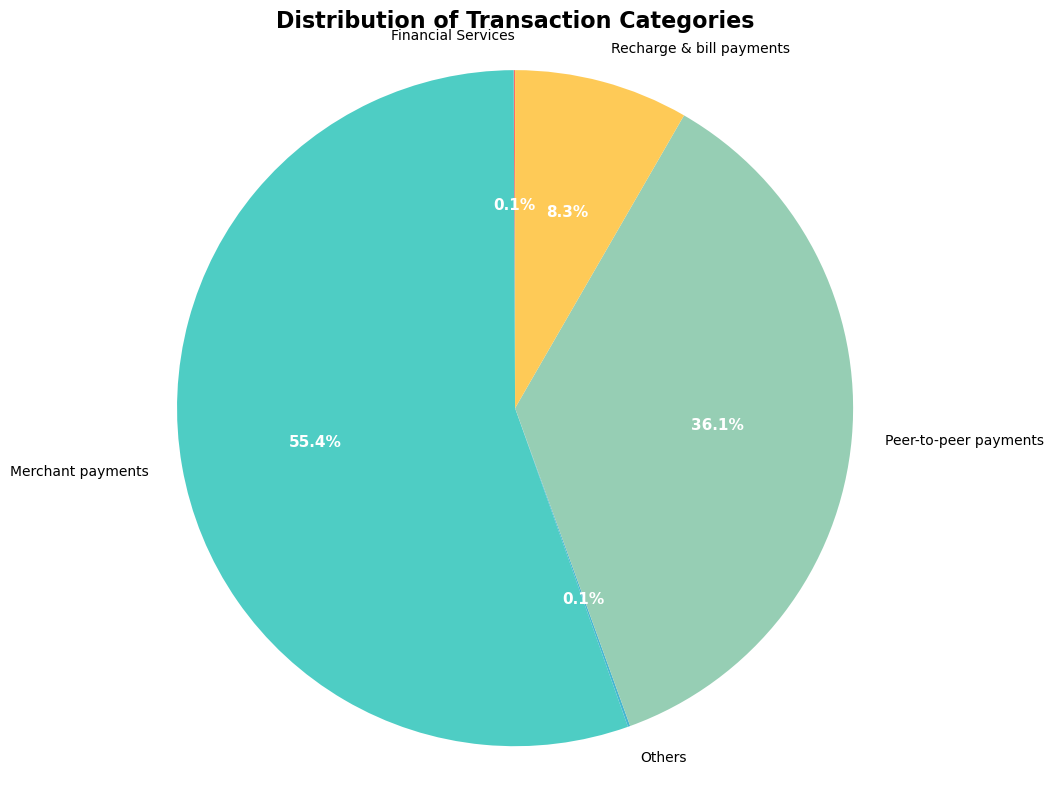

In [43]:
# Group by transaction category and sum the transaction count
transaction_category_counts = df_filtered.groupby('transaction_category')['transaction_count'].sum().reset_index()

# Create a pie chart to visualize the distribution of transaction categories
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
wedges, texts, autotexts = plt.pie(transaction_category_counts['transaction_count'], 
                                   labels=transaction_category_counts['transaction_category'],
                                   colors=colors, autopct='%1.1f%%', startangle=90,
                                   textprops={'fontsize': 10})

plt.title('Distribution of Transaction Categories', fontsize=16, fontweight='bold')

# Make percentage text bold and readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.axis('equal')
plt.tight_layout()
plt.show()

5. Distribution of Transaction Types in a Specific State

In [ ]:
# Choose a state to analyze (with correct capitalization)
state_to_analyze = 'Bihar'

# Filter the DataFrame for the selected state
state_df = df_filtered[df_filtered['state'] == state_to_analyze]

# Group by the correct column name: 'transaction_category'
state_transaction_counts = state_df.groupby('transaction_category')['transaction_count'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']
wedges, texts, autotexts = plt.pie(state_transaction_counts['transaction_count'], 
                                   labels=state_transaction_counts['transaction_category'],
                                   colors=colors, autopct='%1.1f%%', startangle=90,
                                   textprops={'fontsize': 10})

plt.title(f'Distribution of Transaction Types in {state_to_analyze}', fontsize=16, fontweight='bold')

# Make percentage text bold and readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.axis('equal')
plt.tight_layout()
plt.show()

6. Transaction Amount vs. Transaction Count by State

In [45]:
# Group by state to get the total transaction amount and count
state_summary = df_filtered.groupby('state').agg({
    'transaction_amount':'sum',
    'transaction_count':'sum'
}).reset_index()

In [ ]:
# Create a dual-axis chart to visualize the relationship
fig, ax1 = plt.subplots(figsize=(15, 8))

# Sort by transaction amount for better visualization
state_summary_sorted = state_summary.sort_values('transaction_amount', ascending=False).head(15)

# Plot transaction amount on primary y-axis
color1 = '#1f77b4'
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Transaction Amount', color=color1, fontsize=12)
bars1 = ax1.bar(range(len(state_summary_sorted)), state_summary_sorted['transaction_amount'], 
                color=color1, alpha=0.7, label='Transaction Amount')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_yscale('log')

# Create secondary y-axis for transaction count
ax2 = ax1.twinx()
color2 = '#ff7f0e'
ax2.set_ylabel('Transaction Count', color=color2, fontsize=12)
bars2 = ax2.bar(range(len(state_summary_sorted)), state_summary_sorted['transaction_count'], 
                color=color2, alpha=0.5, width=0.6, label='Transaction Count')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yscale('log')

# Set x-axis labels
ax1.set_xticks(range(len(state_summary_sorted)))
ax1.set_xticklabels(state_summary_sorted['state'], rotation=45, ha='right')

plt.title('Transaction Amount vs. Transaction Count by State (Top 15)', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

7. Average Transaction Value (ATV) by State

In [46]:
state_summary['average_transaction_value'] = state_summary['transaction_amount'] / state_summary['transaction_count']

# sort the state by ATV in desc order
atv_sorted = state_summary.sort_values(by='average_transaction_value',ascending=False)

In [ ]:
# Get the top 10 and bottom 10 states by ATV
top_10_atv = atv_sorted.head(10)
bottom_10_atv = atv_sorted.tail(10)

# Combine them into a single dataframe for plotting
atv_comparison = pd.concat([top_10_atv, bottom_10_atv])

# Create the bar chart
plt.figure(figsize=(14, 8))
colors = plt.cm.plasma(np.linspace(0, 1, len(atv_comparison)))
bars = plt.bar(range(len(atv_comparison)), atv_comparison['average_transaction_value'], 
               color=colors, edgecolor='black', alpha=0.8)

plt.title('Top and Bottom 10 States by Average Transaction Value (ATV)', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Transaction Value', fontsize=12)
plt.xticks(range(len(atv_comparison)), atv_comparison['state'], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Correlation Analysis of Key Metrics

Correlation Matrix:
                           transaction_amount  transaction_count  \
transaction_amount                   1.000000           0.988798   
transaction_count                    0.988798           1.000000   
average_transaction_value           -0.255306          -0.293606   

                           average_transaction_value  
transaction_amount                         -0.255306  
transaction_count                          -0.293606  
average_transaction_value                   1.000000  


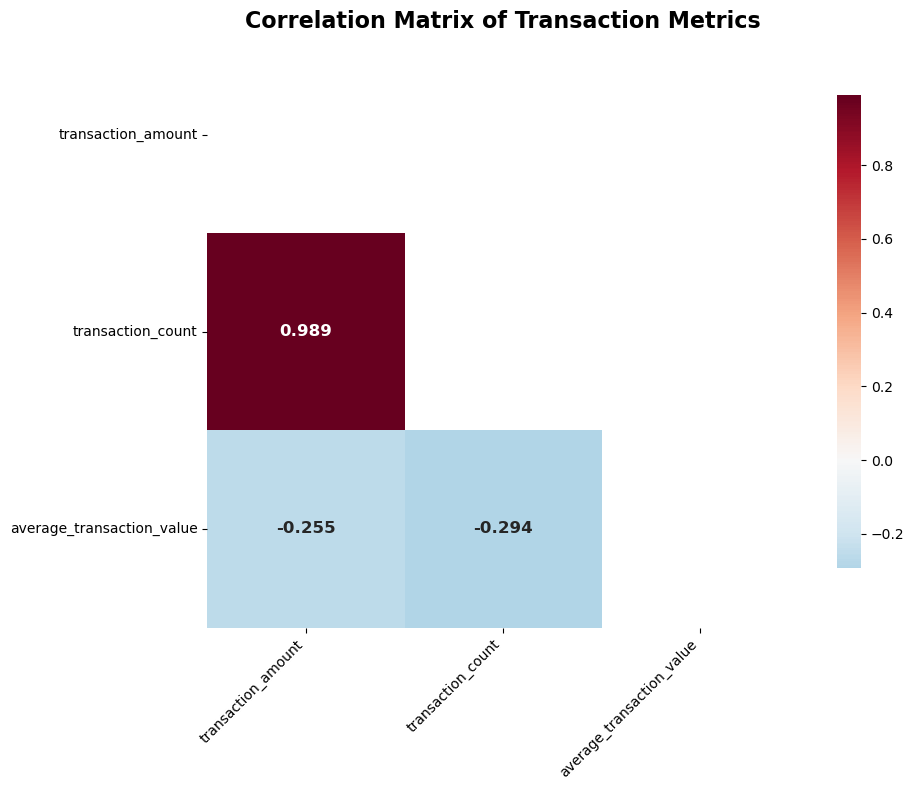

In [47]:
# --- Calculate the Correlation Matrix ---

# Select only the numerical columns for correlation analysis
correlation_data = state_summary[['transaction_amount', 'transaction_count', 'average_transaction_value']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the correlation matrix for reference
print("Correlation Matrix:")
print(correlation_matrix)

# --- Visualize the Correlation Matrix with a Heatmap ---

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='RdBu_r', 
                      center=0,
                      fmt='.3f',
                      square=True,
                      mask=mask,
                      cbar_kws={"shrink": .8},
                      annot_kws={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Correlation Matrix of Transaction Metrics', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()